<a href="https://colab.research.google.com/github/sanketpatel32/Deep-Learning/blob/main/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import tensorflow as tf


In [21]:
print(tf.__version__)

2.8.2


In [22]:
import numpy as np
import pandas as pd


In [23]:
from sklearn.datasets import make_circles
n_samples = 1000
X,y = make_circles(n_samples = n_samples , noise = 0.03 , random_state=42)

In [24]:
X[:10]

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       [-0.39373073,  0.69288277],
       [ 0.44220765, -0.89672343],
       [-0.47964637,  0.67643477],
       [-0.01364836,  0.80334872],
       [ 0.77151327,  0.14775959],
       [-0.16932234, -0.79345575],
       [-0.1214858 ,  1.02150905]])

In [25]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [26]:
circle = pd.DataFrame({"X0" : X[:,0] , "X1" : X[:,1] , "label" : y[:]})

In [27]:
circle 

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


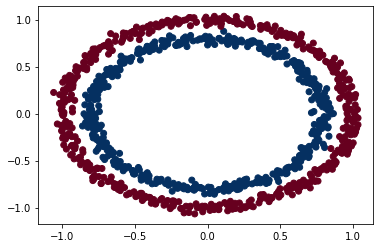

In [28]:
import matplotlib.pyplot as plt

plt.scatter(X[:,0] , X[:,1] , c = y ,cmap="RdBu" )

In [29]:
type(X)

numpy.ndarray

In [30]:
model_1 = tf.keras.Sequential([
      tf.keras.layers.Dense(1)
])
model_1.compile(
    loss = tf.keras.losses.BinaryFocalCrossentropy(),
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ["accuracy"]
)
model_1.fit(X,y,epochs = 100)

Epoch 1/100
32/32 [==============================] - 0s 3ms/step - loss: 2.0684 - accuracy: 0.5230
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.1754 - accuracy: 0.5140
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.1737 - accuracy: 0.4850
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.1738 - accuracy: 0.4710
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.1736 - accuracy: 0.5160
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.1736 - accuracy: 0.4730
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.1736 - accuracy: 0.4700
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.1736 - accuracy: 0.5030
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.1737 - accuracy: 0.4700
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.1737 - accuracy: 0.4960
Epoch 11/

In [31]:
def Model_build():
  model = tf.keras.Sequential([
      tf.keras.layers.Dense(1)
])
  model.compile(
    loss = tf.keras.losses.BinaryFocalCrossentropy(),
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ["accuracy"]
)
  model.fit(X,y,epochs = 100,verbose = 0)
  return model


In [32]:
model_1 = Model_build()


In [33]:
model_1.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.1733 - accuracy: 0.4980


[0.17332972586154938, 0.49799999594688416]

In [39]:
def Model_build():
  model = tf.keras.Sequential([
      tf.keras.layers.Dense(10, activation="relu") ,     
      tf.keras.layers.Dense(1 )
])
  model.compile(
    loss = tf.keras.losses.BinaryFocalCrossentropy(),
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ["accuracy"]
)
  model.fit(X,y,epochs = 100,verbose = 0)
  return model

model_2 = Model_build()
model_2.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.0868 - accuracy: 0.9860


[0.08681093156337738, 0.9860000014305115]

In [40]:
best_model = model_2

In [36]:
# best_model.save("./")

In [43]:
import numpy as np

def plot_decision_boundary(model, X, y):
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  

  x_in = np.c_[xx.ravel(), yy.ravel()] 
  
  y_pred = model.predict(x_in)

  if len(y_pred[0]) > 1:
    print("Doing multiclass classification... \n")
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(y_pred).reshape(xx.shape)
  
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

doing binary classifcation...


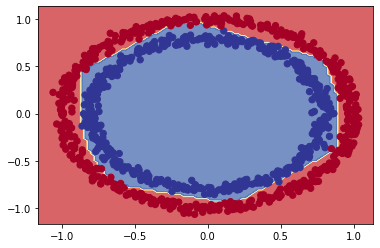

In [44]:
plot_decision_boundary(model_2 , X , y)